# Neccesary modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

# Get the data

In [61]:
background = np.load("data/images_background.npy", allow_pickle=True)
drone = np.load("data/images_drone.npy", allow_pickle=True)

In [62]:
drone /= 255
background /= 255

In [63]:
random.shuffle(drone)
random.shuffle(background)
drone =  drone[0:len(background)]

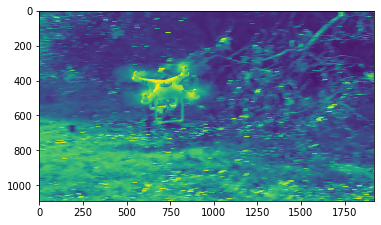

In [64]:
plt.imshow(random.choice(drone))

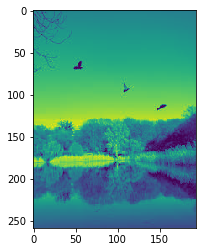

In [65]:
plt.imshow(random.choice(background))

In [66]:
import cv2
drone_data = []
background_data = []
for i, img in enumerate(drone):
    drone_data.append(cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA))
    drone_data[i] = np.expand_dims(drone_data[i], axis=3)
for i, img in enumerate(background):
    background_data.append(cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA))
    background_data[i] = np.expand_dims(background_data[i], axis=3)

/home/NewUsersDir/mohammed/nkalathi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  
/home/NewUsersDir/mohammed/nkalathi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if __name__ == '__main__':


In [67]:
drone_data = np.array(drone_data)
background_data = np.array(background_data)
print(drone_data.shape)
print(background_data.shape)

(42, 256, 256, 1)
(42, 256, 256, 1)


# Train/ test split and data formatting

In [68]:
Y = np.array([0 for i in enumerate(background_data)] + [1 for i in enumerate(drone_data)])
X = np.append(background_data,drone_data,axis=0)
Y = Y.reshape(-1,1)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [70]:
x_test.shape

(26, 256, 256, 1)

# Model Spec

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3"

input_shape = x_train[0].shape
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 124, 124, 64)     

# Train Model

In [74]:
batch_size = 32
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 58 samples, validate on 26 samples
Epoch 1/10
58/58 [==============================] - 5s 79ms/sample - loss: 0.8587 - accuracy: 0.5517 - val_loss: 0.9422 - val_accuracy: 0.4615
Epoch 2/10
58/58 [==============================] - 1s 10ms/sample - loss: 0.4322 - accuracy: 0.8276 - val_loss: 0.9024 - val_accuracy: 0.3462
Epoch 3/10
58/58 [==============================] - 1s 10ms/sample - loss: 0.4154 - accuracy: 0.8793 - val_loss: 1.2988 - val_accuracy: 0.5385
Epoch 4/10
58/58 [==============================] - 1s 11ms/sample - loss: 0.2373 - accuracy: 0.8966 - val_loss: 2.7119 - val_accuracy: 0.5385
Epoch 5/10
58/58 [==============================] - 1s 11ms/sample - loss: 0.2002 - accuracy: 0.9310 - val_loss: 3.5711 - val_accuracy: 0.5385
Epoch 6/10
58/58 [==============================] - 1s 10ms/sample - loss: 0.3594 - accuracy: 0.8448 - val_loss: 4.0813 - val_accuracy: 0.5385
Epoch 7/10
58/58 [==============================] - 1s 10ms/sample - loss: 0.2341 - accuracy: 0.89

In [59]:
model.predict(x_test)

array([[0.8438976 ],
       [0.92414594],
       [0.7611151 ],
       [0.99999356],
       [0.9836736 ],
       [1.        ],
       [0.9986327 ],
       [0.99043494],
       [0.86696804],
       [0.8404962 ],
       [0.8248142 ],
       [0.9999619 ],
       [0.9939055 ],
       [0.91001475],
       [0.9986414 ],
       [0.9999883 ],
       [0.92942053],
       [0.8703543 ],
       [0.99972224],
       [0.9419358 ],
       [0.9764714 ],
       [0.99953413],
       [0.9999995 ],
       [0.8611382 ],
       [0.87673074],
       [1.        ],
       [1.        ],
       [0.8274622 ],
       [0.99999994],
       [0.79076266],
       [0.99999964],
       [0.98763245],
       [0.82813454],
       [0.94866294],
       [1.        ],
       [0.9992917 ],
       [1.        ],
       [0.9898027 ],
       [0.98569906],
       [0.9170771 ],
       [1.        ],
       [0.9920989 ],
       [0.9999998 ],
       [0.8902628 ],
       [0.9999999 ],
       [0.8153475 ],
       [0.8097461 ],
       [0.975